<a href="https://colab.research.google.com/github/gunelr/netflixAnalysis_withPython/blob/main/7_shades_of_data_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7 SHADES OF DATA - TEAM PROJECT 2: "NETFLIX DATA ANALYSIS"

**Team members**

* **Coshgun Rehimli:** coshgunrehimli@gmail.com
* **Günel Alizada:** gunelrafig94@gmail.com
* **Mardan Mirzaguliyev:** mardan.mirzaguliyev@gmail.com
* **Narmin Azizova:** nrminazizova@gmail.com
* **Rəna İsgəndərova:** rena.isgenderova27@gmail.com
* **Shamistan Huseynov:** shamistan.huseynov@gmail.com
* **Turan Aghayev:** turan.agazadeh@gmail.com

## Detect encoding of 'NetflixOriginals.csv' file

### NOTE: CHANGE FILE DIRECTORY IF RAISES NO FILE OR DIRECTORY ERROR

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
from dateutil.parser import parse
import plotly.graph_objects as px
import plotly.express as po

In [53]:
with open("/content/NetflixOriginals.csv", 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

The code returns that encoding is in the most common encoding format "UTF-8".

In [54]:
df = pd.read_csv("/content/NetflixOriginals.csv", encoding = "ISO-8859-1")
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


## Get the basic information about data

In [55]:
# variables to explore
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [57]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


'describe()' functions returned some basic information about the numerical variables in dataset.

## Identify data types of variables

In [58]:
df.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

In [59]:
# number of observations
len(df)

584

Names of variables in dataset and number of variables also number of observations have been identified. There are 6 columns and 584 observations in this dataset.

## Check for NA values

In [60]:
df.isna().any()

Title         False
Genre         False
Premiere      False
Runtime       False
IMDB Score    False
Language      False
dtype: bool

# Question 1



* EN: **In what language most of the long runtime movies have been filmed? Visualize the results.**
* TR: **Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.**

According to the dataset in what language long runtime movies have been filmed?
(Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.)

First task was to identfy in which language long runtime movies have been filmed. According to [Academy of Motion Picture Arts and Sciences](https://en.wikipedia.org/wiki/Academy_of_Motion_Picture_Arts_and_Sciences), [short movies](https://en.wikipedia.org/wiki/Short_film) are movies with a running time of 40 minutes or less, including all credits. So, films with a running time of greater than 40 minutes are needed to be filtered out. For clarity, in this project films with runtime values greater than 45 minutes have been taken as long runtime movies. Because, there are some movies with 41, 42 and near runtime values which seem to include longer credits time. 

In [61]:
long_runtime = df[df['Runtime'] > 45].sort_values("Runtime", ignore_index=True)
long_runtime.head(30)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Porta dos Fundos: The First Temptation of Christ,Comedy,"December 3, 2019",46,4.6,Portuguese
1,Octonauts & the Great Barrier Reef,Animation,"October 13, 2020",47,7.3,English
2,Angela's Christmas Wish,Animation,"December 1, 2020",47,7.1,English
3,ReMastered: Devil at the Crossroads,Documentary,"April 26, 2019",48,7.0,English
4,Sarah Cooper: Everything's Fine,Variety show,"October 27, 2020",49,5.6,English
5,Derren Brown: Sacrifice,Mentalism special,"October 19, 2018",49,7.1,English
6,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
7,Rodney King,One-man show,"April 28, 2017",52,5.8,English
8,The Minimalists: Less Is Now,Documentary,"January 1, 2021",53,5.9,English
9,"Michael Bolton's Big, Sexy, Valentine's Day Sp...",Variety Show,"February 7, 2017",54,6.7,English


The results of new dataset have been visualized in bar graph to see in which languages the movies have been filmed. To do this, first, unique values in 'Languages' column were be identified to check if there were duplicates or misspellings.

In [62]:
unique_languages = long_runtime["Language"].unique()
unique_languages

array(['Portuguese', 'English', 'English/Japanese', 'French', 'Spanish',
       'English/Spanish', 'Japanese', 'English/Mandarin', 'Korean',
       'Italian', 'Thia/English', 'Thai', 'Norwegian', 'Indonesian',
       'Swedish', 'Spanish/Basque', 'Turkish', 'English/Russian', 'Hindi',
       'Polish', 'English/Ukranian/Russian', 'English/Taiwanese/Mandarin',
       'German', 'Filipino', 'Spanish/English', 'Dutch', 'Malay', 'Tamil',
       'Marathi', 'English/Arabic', 'Spanish/Catalan', 'English/Korean',
       'English/Akan', 'Khmer/English/French'], dtype=object)

Then, these unique values were counted and sorted in descending order

In [63]:
language_counts = long_runtime.groupby("Language")["Language"].count().sort_values(ascending=False).to_frame("Number of movies")
language_counts

,Number of movies
Language,
English,363
Hindi,33
Spanish,29
French,20
Italian,14
Portuguese,11
Indonesian,9
Korean,6
Japanese,5


In [64]:
language_countsTop5 = language_counts.head(5)
language_countsTop5

,Number of movies
Language,
English,363
Hindi,33
Spanish,29
French,20
Italian,14


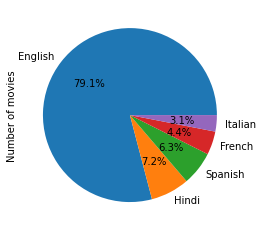

In [65]:
language_countsTop5.plot.pie(y="Number of movies", legend=False, autopct='%1.1f%%')

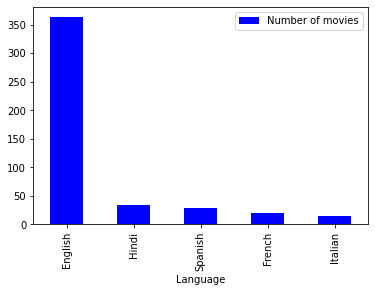

In [66]:
language_countsTop5.plot.bar(color="blue")

As it is obvious from both of the graphs English is a dominant language. 363 movies with long runtime have been filmed in English. Also, there are movies filmed in two or three languages together which also include English.

# Question 2

* **EN: Visualize the IMDB scores of the 'Docementary' movies that filmed between January, 2019 and June, 2020.**
* **TR: 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.**

In introduction section 'dtype' function returnd data types of dataframe. All columns except for 'Runtime' and 'IMDB Score' was object data type which means string. To filter data frame according to the given time period, data type of "Premiere" column was needed to be converted into data format.

## Convert the type of data in 'Premiere' column to date format

In [67]:
df['Premiere'] = pd.to_datetime(df['Premiere'])

## Define start and end date

In [68]:
start_date='2019-01-01'
end_date='2020-06-01'

## Create filtered dataframe according to dates

In [69]:
mask = (df['Premiere'] >= start_date) & (df['Premiere'] <= end_date)
df_dates = df.loc[mask].reset_index().iloc[: , 1:]
df_dates

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
2,Drive,Action,2019-11-01,147,3.5,Hindi
3,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
4,Ghost Stories,Horror anthology,2020-01-01,144,4.3,Hindi
...,...,...,...,...,...,...
171,A Secret Love,Documentary,2020-04-29,82,7.9,English
172,Marriage Story,Drama,2019-12-06,136,7.9,English
173,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
174,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English


## Create new dataframe with only documentary movies and selected start and end dates

In [70]:
docs_dates = df_dates[df_dates['Genre'] =='Documentary'].sort_values("IMDB Score", ascending=False, ignore_index=True)
docs_dates
top_ten_docs = docs_dates.head(10)
top_ten_docs

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
1,A Secret Love,Documentary,2020-04-29,82,7.9,English
2,Crip Camp: A Disability Revolution,Documentary,2020-03-25,108,7.7,English
3,Brene Brown: The Call to Courage,Documentary,2019-04-19,76,7.7,English
4,Tell Me Who I Am,Documentary,2019-10-18,85,7.6,English
5,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,2019-06-12,144,7.6,English
6,Homecoming: A Film by Beyonce,Documentary,2019-04-17,137,7.5,English
7,Miss Americana,Documentary,2020-01-31,85,7.4,English
8,Fire in Paradise,Documentary,2019-11-01,39,7.4,English
9,American Factory,Documentary,2019-08-21,110,7.4,English


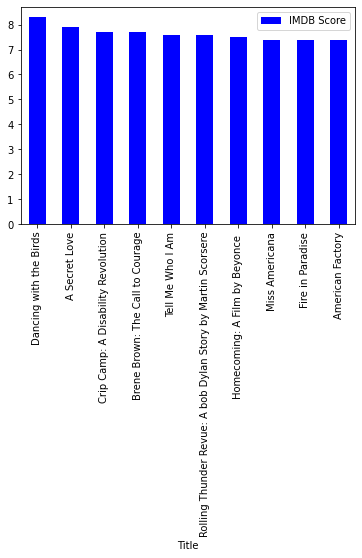

In [71]:
top_ten_docs.plot.bar(x = "Title", y = "IMDB Score", color="blue")

Both the final data frame and bar graph revealed that documentary film "Dancing with the birds" has the highest IMDB score among the documentary films filmed between January 1, 2019 and June 30, 2020.

# Question 3
* **EN: Which movie genre the film with the highest IMDB score has been filmed in English?**
* **TR: İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?**

New data frame was created containing only the movies that filmed in English. By sorting this list according to the IMDB score in descending order, the answer will be found to the third question.

In [72]:
english_movies = df.loc[df['Language'] == 'English'].sort_values("IMDB Score", ascending=False, ignore_index=True)
english_movies

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
1,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
2,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
3,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
4,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
...,...,...,...,...,...,...
396,Mercy,Thriller,2016-11-22,90,4.2,English
397,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
398,Paradox,Musical/Western/Fantasy,2018-03-23,73,3.9,English
399,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English


So, a film  "A Life on Our Planet" is the highest ranked film with IMDB score of 9.0 and its genre is Documentary.

# Question 4

* **EN: What is the average runtime value of films filmed in 'Hindi'?**
* **TR: 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?**

In [73]:
hindi_avg_runtime = round(df[df["Language"] == "Hindi"]["Runtime"].mean())
hindi_avg_runtime

116

Code snipped above returned that average runtime of films in Hindi language is 116 minutes.

# Question 5

* **EN: How many categories are there in Genre column? Visualize.**
* **TR: Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.**

In [74]:
df["Genre"].unique()
df["Genre"].value_counts()
print(df["Genre"].value_counts())
topgenre = df["Genre"].value_counts().nlargest(30)
topgenre

fig = po.bar(data_frame=topgenre, x=topgenre.index, y=topgenre.values, labels={"y":"Number of Movies from the Genre", "index":"Genres"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64


# Question 6

* **EN: Find 3 most commonly used languages in dataset.**
* **TR: Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.**

**The most used three languages**

Using value_counts() function, find most used languages in the films and print first three

In [75]:
lang_count = df["Language"].value_counts().head(3)
lang_count

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

## Question 7

* **EN: Find 10 films with highest IMDB score.**
* **TR: IMDB puanı en yüksek olan ilk 10 film hangileridir?)**

## Create sorted list of films

In order to identify 10 films with highest IMDB rankings the data frame was sorted in descending order by IMDB score variable. Then, first 10 films listed.

In [76]:
sorted_films = df.sort_values(by="IMDB Score", ascending=False, ignore_index=True).head(10)
sorted_films

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
1,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
2,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
3,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
4,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
5,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
6,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
7,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
8,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
9,13th,Documentary,2016-10-07,100,8.2,English


New dataframe contains the list of 10 films with the highest IMDB score.

## Question 8

* **EN: What is the correlation between IMDB score and Runtime? Visualize.**
* **TR: IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.**

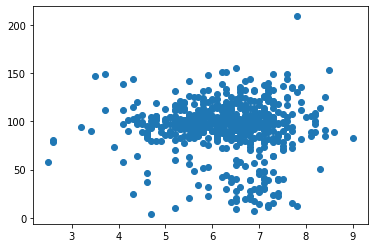

In [77]:
plt.scatter(df['IMDB Score'],df['Runtime'])
plt.show()

In [78]:
correlation_value = df['IMDB Score'].corr(df['Runtime'])
correlation_value

-0.04089629142078858

## Question 9

* **EN:What are the 10 Genre with the highest IMDB score?**
* **TR: IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.**

In [79]:
top_imdb_genre = df.sort_values(by = ['IMDB Score'], ascending = False, ignore_index=True).head(10)
top_imdb_genre

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
1,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
2,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
3,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
4,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
5,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
6,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
7,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
8,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
9,13th,Documentary,2016-10-07,100,8.2,English


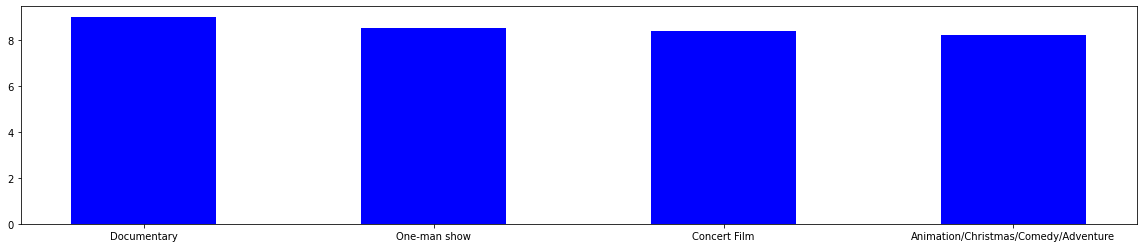

In [80]:
fig1, ax1 = plt.subplots()
ax1.bar(top_imdb_genre['Genre'],top_imdb_genre['IMDB Score'], width = 0.5, color = 'blue')
fig1.set_figwidth(20)

plt.show()

So, as the graph says documentary movies have the highest IMDB rankings.

## Question 10

* **EN: List 10 movies with longest 'Runtime' and visualize.**
* **TR: 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.**

In this task we should find top ten longest movies according to their 'Runtime'. For solving this task, we use *pandas* library for reading data, then with methods below, we find the result which we want

In [81]:
top_data_runtime = df.sort_values(by = ['Runtime'], ascending = False, ignore_index=True).head(10)
top_data_runtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,The Irishman,Crime drama,2019-11-27,209,7.8,English
1,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
2,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
3,Citation,Drama,2020-11-06,151,6.2,English
4,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
5,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
6,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
7,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
8,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
9,Drive,Action,2019-11-01,147,3.5,Hindi


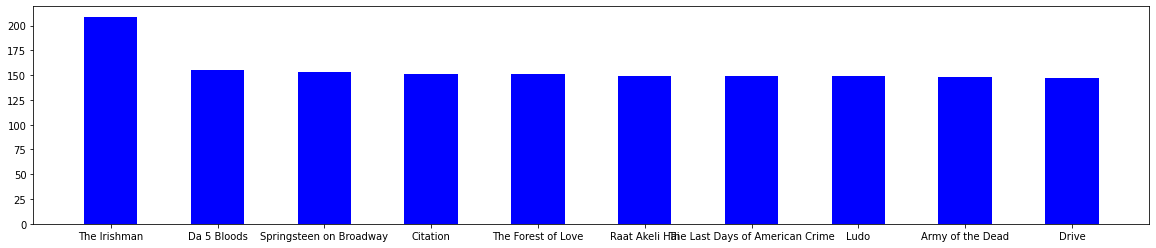

In [82]:
fig1, ax1 = plt.subplots()
ax1.bar(top_data_runtime['Title'],top_data_runtime['Runtime'], width = 0.5, color = 'blue')
fig1.set_figwidth(20)

plt.show()

# Question 11

* **EN: In which year the number of movies filmed is the highest? Visualize the results.**
* **TR: Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.**

According to our task, we should group by our tasks according to year then visualize the result. But we had a problem that Year column does not only contains year itself. For example data format is something like this *April 2, 2020*. Therefore we firstly took *Premiere* column, then we from each row, we only took last for characters (year length is 4), then we converted it to integer for grouping by easily. After all, we assigned new column to older one. To our updated dataframe, we applied *groupby()* method. Then we are defining years and number of movies in each year and take 3 top years.

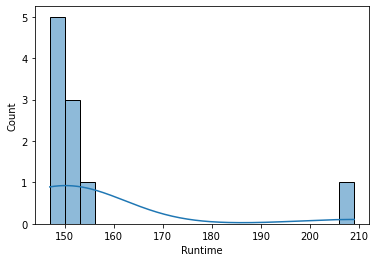

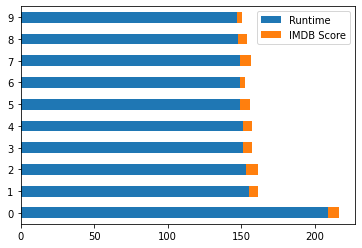

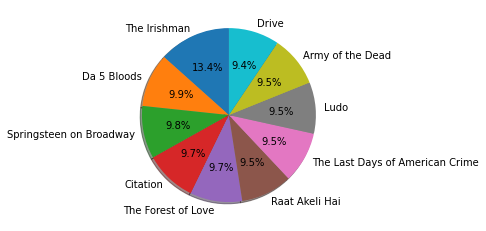

In [83]:
df = pd.read_csv("/content/NetflixOriginals.csv", encoding = "ISO-8859-1")
df

top_data_max_count = df.sort_values(by = ['Runtime'], ascending = False, ignore_index="True").head(10)
top_data_max_count

sns.histplot(data=top_data_max_count, x="Runtime", kde= True)

top_data_max_count.plot.barh(stacked=True);

fig1, ax1 = plt.subplots()
ax1.pie(top_data_max_count['Runtime'],  labels=top_data_max_count['Title'], autopct='%1.1f%%',shadow=True, startangle=90)

plt.show()

# Question 12

* **EN: Which movies have the lowest IMDB scores and in what languages they have been filmed? Visualize.**
* **TR: Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.**

## Sort data set according to IMDB score

In [84]:
imdb_score = df.sort_values('IMDB Score')
imdb_score.head(100)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
105,The Princess Switch: Switched Again,Romantic comedy,"November 19, 2020",97,5.4,English
104,Outside the Wire,Action/Science fiction,"January 15, 2021",114,5.4,English
106,Under the Riccione Sun,Romantic teenage drama,"July 1, 2020",101,5.4,Italian
102,Madame Claude,Drama,"April 2, 2021",112,5.4,French


## Create new dataframe populated with the movies IMDB scores less than 6

In [85]:
lessthan6 = imdb_score[imdb_score['IMDB Score'] < 6]
lessthan6

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English
193,Amateur,Sports-drama,"April 6, 2018",96,5.9,English
192,A Fall from Grace,Thriller,"January 17, 2020",120,5.9,English
191,6 Balloons,Drama,"April 6, 2018",75,5.9,English


In [86]:
unique_language = lessthan6.Language.unique()
unique_language

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'Portuguese', 'English/Spanish', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Thai', 'Marathi', 'Japanese', 'Swedish',
       'Spanish/Basque'], dtype=object)

In [87]:
# sort according to the counts in descending order
language_counts = lessthan6.groupby("Language")["Language"].count().sort_values(ascending=False)
language_counts

Language
English             130
Hindi                15
French               10
Spanish               9
Italian               9
Portuguese            5
German                4
Indonesian            3
Polish                3
Dutch                 2
Marathi               2
Thai                  2
Korean                2
Filipino              2
Turkish               2
Malay                 1
Norwegian             1
Japanese              1
English/Spanish       1
Spanish/Basque        1
Swedish               1
English/Japanese      1
Name: Language, dtype: int64

In [88]:
# top 5 languages with films with lowest IMDB ranking 
five_movies_lowthan6 = language_counts.head(5)

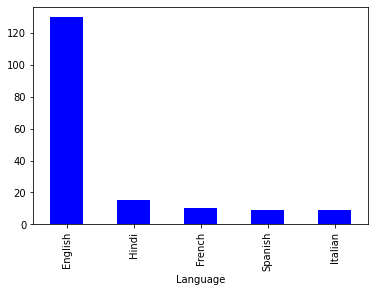

In [89]:
# Visualize the results
barplot = five_movies_lowthan6.plot.bar('lessthan6', 'unique_language', color='blue')

# Question 13

* **EN:Which year has the highest total runtime?**
* **TR: Hangi yılın toplam "runtime" süresi en fazladır?**

In [90]:
df['Year'] = pd.DatetimeIndex(df['Premiere']).year
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020


In [91]:
runtime_byYear = df.groupby('Year').aggregate({'Runtime':'sum'}).sort_values("Runtime", ascending=False)
runtime_byYear

,Runtime
Year,
2020,17384
2019,10856
2018,9405
2021,7214
2017,6129
2016,2766
2015,814
2014,81


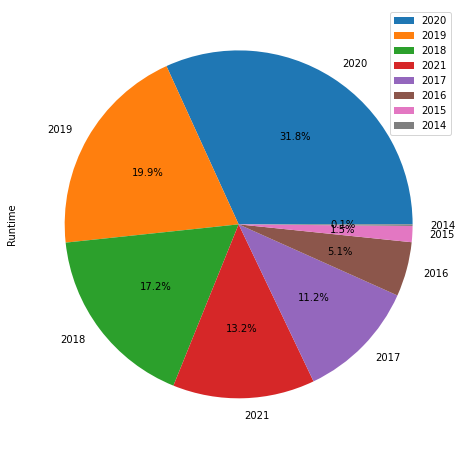

In [92]:
plot = runtime_byYear.plot.pie(subplots=True, figsize=(11, 8), autopct='%1.1f%%')

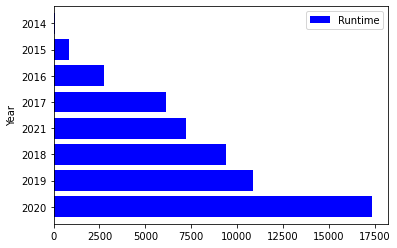

In [93]:
ax = runtime_byYear.plot.barh(color={"Runtime": "blue"}, width=0.8)

# Question 14 ??NOT SUBMITTED??

* **EN: Which genre is the mostly used genre in each language?**
* **TR: Her bir dilin en fazla kullanıldığı "Genre" nedir?**

# Question 15

* **EN: Are there any outliers in the dataset? Identify.**
* **TR: Veri setinde outlier veri var mıdır? Açıklayınız.**

In [94]:
# check for the outliers in Runtime column
fig = po.box(df, y="Runtime")
fig.show()

In [95]:
# Check outlier in IMDB Score column
fig = po.box(df, y="IMDB Score")
fig.show()

In [96]:
# join two plots
plot = px.Figure()
 
plot.add_trace(px.Box(y=df['Runtime'],name="Runtime"))
plot.add_trace(px.Box(y=df['IMDB Score'],name='IMDB Score'))

plot.show()